In [6]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [7]:
b=2.26e-3
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe':1000}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.2
zstop = 0.2
zsamples = 100000 
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 10000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_WA = {'func': curly_GBWA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_WA = {**pulse_params, **harm_params, **sol_params_WA}


In [8]:
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

In [9]:
#func = dAmplitudes_dz_1_photon
#func = dAmplitudes_dz_1p1_REMPI
#func = dAmplitudes_dz_1p1_REMPI_355
func = curly_GBWA
#func = dA118_dz_GBWA

PXe = 25

chi2 = 1.5e-50 # [Units?]
#chi2 = 1.5e-33 # Value from original File

#chi3 = 5.6e-35

chi3 = 1.5e-35   # [Units?]
#chi3 = 1.5e-44  #value from original file 

sigma_1p1 = 6.3E-23
#sigma_1p1 = 6.3E-37 #value from original file

sigma_1p1_355 = 1.6E-23
#sigma_1p1_355 = 1.6E-43  #value from original file   

    

pulse_params = {'b' : b,            # [m] confocal parameter
                   'zR' : zR,           # [m] Rayleigh range
                   'omega0' : omega0,   # [m] beam waist at focus
                   'energy' : 0.017,       # [J] single pulse energy
                   'duration' : 7e-9}     # [s] single pulse length

harm_params = {'sigma' : chi2,
               'chi3' : chi3,
               'PXe' : PXe,
               'sigma_1p1' : sigma_1p1,
               'sigma_1p1_355' : sigma_1p1_355
               }


In [10]:
sigma_1p1_Ar = 8.20839154e-48 #Values from the fit
sigma_1p1_Kr = 2.35576293e-47

GBWA_params = {'b' : b,            # [m] confocal parameter
                  'zR' : zR,           # [m] Rayleigh range
                  'omega0' : omega0,   # [m] beam waist at focus
                  'energy' : 0.017,       # [J] single pulse energy
                  'duration' : 7e-9,     # [s] single pulse length

                  'sigma' : sigma_1p1_Ar,
                  'chi3' : chi3,
                  'PXe' : PXe,

                  'fluor_detect_window': (-0.1, 0.1),
                  'func': "dA118_dz_GBWA",
                       'tlabel': "Gaussian Beam"
                  }

In [13]:
Psamples = 100
Prange = (1, 80) # [Torr]
PXe = np.linspace(Prange[0], Prange[1], Psamples)
Pscan = xr.DataArray(PXe, 
                     dims = ('PXe'), 
                     attrs = {'units': 'Torr',
                              'long_name': "Partial Pressure of Xenon"})

In [14]:
scanned_WA= scan_builder(single_func, scan_builder, [Pscan])(params=sol_params_WA)

KeyError: 'Scan parameter is not in parameter list.'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=150)

def plot_pressure_scan(data, ax, selections=None, norm=True):
    sel = {**selections}
    if norm:
        norm_DataArray(data.sel(sel)).plot(ax=ax, label=data.attrs["tlabel"])
    else:
        data.sel(sel).plot(ax=ax, label=data.attrs["tlabel"])
    ax.set_title(f"Scanning: Pressure")
    ax.legend()

#plot_pressure_scan(photon1_scanned, ax, selections={'variable': '118 signal'})
#plot_pressure_scan(photon2_scanned, ax, selections={'variable': '118 signal'})
plot_pressure_scan(rempi_pseudo_scanned, ax, selections={'variable': '118 signal'})
#plot_pressure_scan(rempi_1p1_scanned, ax, selections={'variable': '118 signal'})
plot_pressure_scan(GBWA_scanned, ax, selections={'variable': '118 signal'})
    
data = plot_params[0][0]
data.plot(x='PXe', y='Sig_118', yerr='Sig_118_Err', ax=ax, label="Experimental")

    
plt.tight_layout()
plt.xlim(0,100)
plt.plot()
fig.savefig('plot.png')

(0.005, 0.01)

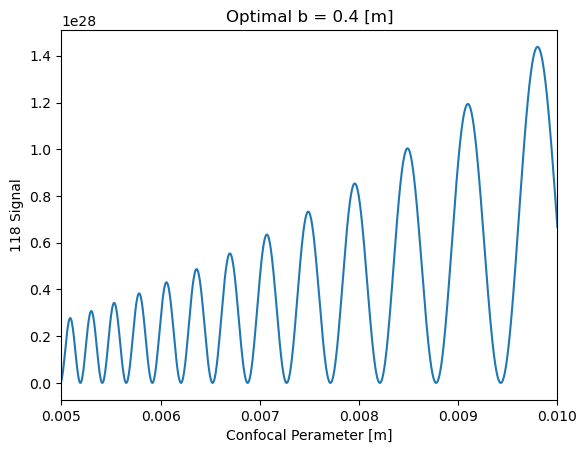

In [ ]:
plt.plot(scanned_WA.b.data,scanned_WA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.4 [m]')
plt.xlim(5e-3,1e-2)



In [ ]:
# b_to_f(0.5e-2,0.005)*100
b_to_f(0.5e-2,0.01)

1.0517459757292904

NameError: name 'scanned_WA' is not defined

In [ ]:
#scanned_WA.data[:,0]

array([4.87043493e+21, 4.12490301e+21, 2.71977718e+18, 2.34118419e+21,
       5.87620430e+21, 5.60671167e+19, 4.18053886e+20, 2.28457098e+22,
       1.01440751e+22, 1.91129301e+22, 1.52141350e+21, 3.62760203e+20,
       2.05862394e+21, 1.19889195e+23, 4.23314180e+22, 1.32334171e+23,
       2.39166156e+23, 3.37733606e+23, 4.93911584e+23, 3.43076797e+23,
       1.95108632e+23, 7.88762625e+22, 6.59523213e+23, 9.01146801e+23,
       4.59562306e+22, 7.91235741e+23, 2.29939587e+23, 1.06887092e+24,
       1.10416173e+24, 2.16653832e+23, 1.08145243e+24, 2.29862282e+23,
       1.37155400e+24, 2.13845475e+24, 2.34045262e+24, 5.28337166e+21,
       1.01455675e+22, 1.23124037e+23, 1.86498526e+24, 1.13298419e+23,
       2.01813215e+24, 2.76819101e+24, 4.83241296e+23, 2.41329423e+24,
       2.30086654e+24, 4.73294791e+24, 2.27641780e+24, 2.43162330e+24,
       5.34742890e+24, 4.77597669e+24, 4.00592160e+23, 7.12768075e+24,
       1.31069181e+24, 5.83909581e+23, 4.61424946e+24, 7.21879204e+24,
      

In [ ]:
opt_b_index = np.where(scanned_WA.data[:,0] == max(scanned_WA.data[:,0]))[0][0]
print('optimal b value: ',scanned_WA.b.data[opt_b_index])


optimal b value:  0.009801801801801801


In [ ]:
b=0
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe':1000}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_NA = {'func': curly_GBNA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_NA = {**pulse_params, **harm_params, **sol_params_NA}

bsamples = 1000
brange = (1e-4, 1e-2) # confocal perameter [m]
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

B_scan_NA = scan_builder(single_func, params_NA, [bscan])

In [ ]:
scanned_NA = B_scan_NA(params=params_NA)

0.0001
0.00010990990990990992
0.00011981981981981982
0.00012972972972972974
0.00013963963963963964
0.00014954954954954954
0.00015945945945945947
0.00016936936936936937
0.0001792792792792793
0.0001891891891891892
0.0001990990990990991
0.000209009009009009
0.00021891891891891892
0.00022882882882882885
0.00023873873873873875
0.00024864864864864865
0.00025855855855855855
0.00026846846846846845
0.0002783783783783784
0.0002882882882882883
0.0002981981981981982
0.0003081081081081081
0.000318018018018018
0.00032792792792792796
0.00033783783783783786
0.00034774774774774776
0.00035765765765765766
0.00036756756756756756
0.00037747747747747746
0.00038738738738738736
0.0003972972972972973
0.0004072072072072072
0.0004171171171171171
0.000427027027027027
0.0004369369369369369
0.00044684684684684686
0.00045675675675675676
0.00046666666666666666
0.00047657657657657656
0.00048648648648648646
0.0004963963963963965
0.0005063063063063064
0.0005162162162162163
0.0005261261261261262
0.0005360360360360361
0.0

(0.005, 0.01)

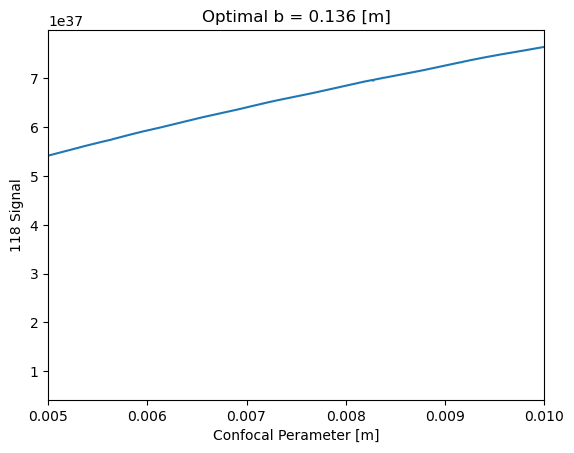

In [ ]:
plt.plot(scanned_NA.b.data,scanned_NA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.136 [m]')
plt.xlim(5e-3,1e-2)



In [ ]:
opt_b_index_NA = np.where(scanned_NA.data[:,0] == max(scanned_NA.data[:,0]))[0][0]
print(scanned_NA.b.data[opt_b_index_NA])

0.01


In [ ]:
omega_initial = 0.5e-2
b_final = 0.4

b_to_f(omega_initial,0.002260011735083854)

0.4999999999990347

In [ ]:
k_355 = 2*np.pi/lambda_355
b_yag = k_355*omega_initial**2
print(b_yag)

442.47783853377365


In [ ]:
(2*omega_initial/b_yag)**2

5.107600867410249e-10

In [ ]:
zR_yag = b_yag/2
q_yag = complex(0,zR_yag)
params = {'lambda':lambda_355}
q_to_params('Yag perameters out of laser: ',params)
q_lens1=thin_lens(q_yag,100e-2)
print('AFTER THIN LENS:')
q_to_params(q_lens1,params)
q_focus1=free_space(q_lens1,0.9999795700139232)
print('AT FOCUS:')
q_to_params(q_focus1,params)


AFTER THIN LENS:
positon relative to focus:  -0.9999795700139232 [m]
beam spot size:  0.005 [m]
AT FOCUS:
positon relative to focus:  0.0 [m]
beam spot size:  2.2599771059007745e-05 [m]


In [ ]:
omega0_lens1 = 2.2599771059007745e-05

b_lens1 = k_355*omega0_lens1**2
print(b_lens1)

0.009039816080529837


In [ ]:
b_to_f(2.2599771059007745e-05,0.4)*100

1.1227886160586296

In [ ]:
b_to_f(0.5e-2,0.4)

6.648898856980159

In [ ]:
f_to_b(2.2599771059007745e-05,1.2e-2)

0.5128420274853751

In [ ]:
evalOmega0(0.4)*100

0.015033297016639142

In [ ]:
b_to_f(0.5e-2,5)

23.387703606514624

In [ ]:
b_to_f()